In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pandas as pd
from pandas import read_csv
import csv
from matplotlib import pyplot



In [14]:
#reading iris 2 class dataset
iris=0
ionosphere=1
if iris:
  data = np.genfromtxt('iris_2class.data', delimiter = ',')
  #extracting first 4 columns for input features
  X = data[:,:4]
  #extracting last for label
  y = data[:, 4]
elif ionosphere:
  
  
  data_filename='ionosphere.data'
  
  # Size taken from the dataset and is known
  X = np.zeros((351, 34), dtype='float')
  y = np.zeros((351,), dtype='bool')

  with open(data_filename, 'r') as input_file:
      reader = csv.reader(input_file)
      for i, row in enumerate(reader):
          # Get the data, converting each item to a float
          data = [float(datum) for datum in row[:-1]]
          # Set the appropriate row in our dataset
          X[i] = data
          # 1 if the class is 'g', 0 otherwise
          if row[-1] == 'g':
            y[i]=1
          else:
            y[i]=0


# print(data.shape)
print(X.shape)
print(y.shape)
# print(y)

(351, 34)
(351,)


In [15]:
#splitting dataset in 4:1 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.T
y_train = y_train.reshape(1, y_train.shape[0])
X_test = X_test.T
y_test = y_test.reshape(1, y_test.shape[0])


print ('Total Training Samples: {}'.format (X_train.shape[1]))
print ('Train X Shape: ', X_train.shape)
print ('Train Y Shape: ', y_train.shape)
print ('\nTest X Shape: ', X_test.shape)
print ('y_test Shape: ', y_test.shape)
print(X_test)

Total Training Samples: 280
Train X Shape:  (34, 280)
Train Y Shape:  (1, 280)

Test X Shape:  (34, 71)
y_test Shape:  (1, 71)
[[ 1.       1.       1.      ...  1.       1.       0.     ]
 [ 0.       0.       0.      ...  0.       0.       0.     ]
 [ 0.4709   0.82254  0.89589 ...  0.79847  1.       1.     ]
 ...
 [-0.24339 -0.0422  -0.07029 ... -0.1875   0.00246  1.     ]
 [ 0.2672   0.78439  0.76862 ...  1.       0.17758  1.     ]
 [ 0.04233  0.01214  0.27926 ... -0.0574   0.7979   1.     ]]


In [16]:
#define the number if neurons in input layer, hidden layers (taking as 4) and output layer
input_unit = X.shape[1] # size of input layer
hidden_unit = 34 #hidden layer of size 4
output_unit = 1 # size of output layer

print("The size of the input layer is:  = " + str(input_unit))
print("The size of the hidden layer is:  = " + str(hidden_unit))
print("The size of the output layer is:  = " + str(output_unit))

The size of the input layer is:  = 34
The size of the hidden layer is:  = 34
The size of the output layer is:  = 1


In [17]:
def parameters_initialization(input_unit, hidden_unit, output_unit):
    #"Initialize the parameters for a two-layer network and for an  L -layer neural network"
    
    
    np.random.seed(2) 
    #"COMPLETE CODE SNIPPET BELOW"
    W1 = np.random.randn(hidden_unit, input_unit)*0.01
    b1 = np.zeros((hidden_unit, 1))
    W2 = np.random.randn(output_unit, hidden_unit)*0.01
    b2 = np.zeros((output_unit, 1))

    assert(W1.shape == (hidden_unit, input_unit))
    assert(b1.shape == (hidden_unit, 1))
    assert(W2.shape == (output_unit, hidden_unit))
    assert(b2.shape == (output_unit, 1))

    #assigning parameter values to dictionary
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [18]:
def sigmoid(z):
    #Implementing the sigmoid activation function

    #Fill the Code snippet Below
    act_out = 1/(1+np.exp(-z))

    return act_out

def forward_propagation(X, parameters):
    #Implement Forward propagation

    #Extracting parameter values from dictionary
    W1 = parameters['W1']
    b1 = parameters['b1']

    W2 = parameters['W2']
    b2 = parameters['b2']
    
    #Complete Code Snippet below
    Z1 = np.dot(W1, X) + b1
    A1 = np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    #Till here

    #Storing each individual matrics computed for assisting with Back prop
    cache = {"Z1": Z1,"A1": A1,"Z2": Z2,"A2": A2}
    
    return A2, cache

def backward_propagation(parameters, cache, X, Y):
    #Calculating gradients

    m = X.shape[1]
    
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
   
    #Fill the code snippet below with gradients
    dZ2 = A2-Y
    dW2 = (1/m) * np.dot(dZ2, A1.T)
    db2 = (1/m) * np.sum(dZ2, axis=1, keepdims=True)

    dZ1 = np.multiply(np.dot(W2.T, dZ2), 1 - np.power(A1, 2))
    dW1 = (1/m) * np.dot(dZ1, X.T) 
    db1 = (1/m)*np.sum(dZ1, axis=1, keepdims=True)

    
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2,"db2": db2}
    
    return grads

def gradient_descent(parameters, grads, learning_rate = 0.1):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
   
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']

    W1 = W1 - learning_rate * dW1
    b1 = b1 - learning_rate * db1
    W2 = W2 - learning_rate * dW2
    b2 = b2 - learning_rate * db2
    
    parameters = {"W1": W1, "b1": b1,"W2": W2,"b2": b2}
    
    return parameters

def cross_entropy_cost(A2, Y, parameters):
    # number of training example
    m = Y.shape[1] 

    # Compute the cross-entropy cost
    logprobs = np.multiply(np.log(A2), Y) + np.multiply((1-Y), np.log(1 - A2))

    cost = - np.sum(logprobs) / m
    cost = float(np.squeeze(cost))
                                    
    return cost

def prediction(parameters, X):
    A2, _ = forward_propagation(X, parameters)
    predictions = np.round(A2)
    
    return predictions

In [24]:

def check_accuracy(parameters): 
  predictions = prediction(parameters, X_train)
  train_Accuracy = float((np.dot(y_train, predictions.T) + np.dot(1 - y_train, 1 - predictions.T))/float(y_train.size)*100)
  print ('Accuracy Train: {}%'.format(train_Accuracy))

  predictions = prediction(parameters, X_test)
  test_Accuracy = float((np.dot(y_test, predictions.T) + np.dot(1 - y_test, 1 - predictions.T))/float(y_test.size)*100)
  print ('Accuracy Test: {}%'.format(test_Accuracy))
  return train_Accuracy,test_Accuracy

Cost after iteration 0 is 0.692936931685913
Training and Test Accuracy for this particular iteration is:
Accuracy Train: 65.0%
Accuracy Test: 60.56338028169014%
Cost after iteration 50 is 0.6381791493873871
Training and Test Accuracy for this particular iteration is:
Accuracy Train: 65.0%
Accuracy Test: 60.56338028169014%
Cost after iteration 100 is 0.5760092764203345
Training and Test Accuracy for this particular iteration is:
Accuracy Train: 66.07142857142857%
Accuracy Test: 61.97183098591549%
Cost after iteration 150 is 0.46851183008639613
Training and Test Accuracy for this particular iteration is:
Accuracy Train: 83.92857142857143%
Accuracy Test: 77.46478873239437%
Cost after iteration 200 is 0.3776432057669788
Training and Test Accuracy for this particular iteration is:
Accuracy Train: 87.14285714285714%
Accuracy Test: 81.69014084507043%
Cost after iteration 250 is 0.3226686367262016
Training and Test Accuracy for this particular iteration is:
Accuracy Train: 90.35714285714286%
A

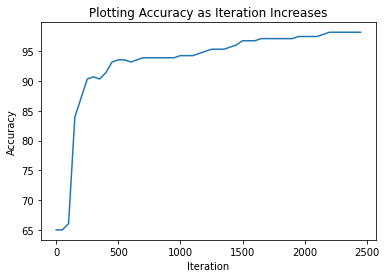

In [29]:
def neural_network_model(X, Y, hidden_unit, num_iterations = 2000):
    np.random.seed(3)

    
    parameters = parameters_initialization(input_unit, hidden_unit, output_unit)
   
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    #Training the model
    graph_x,graph_y=[],[]
    train_acc_list,test_acc_list=[],[]
    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = cross_entropy_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = gradient_descent(parameters, grads)
        if i % 50 == 0:
            print ("Cost after iteration {} is {}".format(i, cost))
            print("Training and Test Accuracy for this particular iteration is:",)
            train_acc_val,test_acc_val = check_accuracy(parameters)
            graph_x.append(i)
            graph_y.append(cost)
            train_acc_list.append(train_acc_val)
            test_acc_list.append(test_acc_val)


    # plt.plot(graph_x, graph_y)
    # plt.xlabel('Iteration')
    # plt.ylabel('Cost')
    # plt.title('Plotting Cost as Iteration Increases')
    plt.plot(graph_x, train_acc_list)
    plt.xlabel('Iteration')
    plt.ylabel('Accuracy')
    plt.title('Plotting Accuracy as Iteration Increases')
    plt.show()       
    return parameters

parameters = neural_network_model(X_train, y_train, 4, num_iterations=2500)


In [11]:
check_accuracy()

Accuracy Train: 98.21428571428571%
Accuracy Test: 88.73239436619718%
